# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
import itertools
import pathlib
import warnings
from PIL import Image
from random import randint
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from keras import layers
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow.keras.preprocessing import image_dataset_from_directory
#from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Input,Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

from distutils.dir_util import copy_tree, remove_tree
import os
#print(os.listdir("../input/alzheimer-mri-dataset/Dataset"))
print("TensorFlow Version:", tf.__version__)
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader
import io
import time
import copy
from glob import glob
from tqdm import tqdm
import albumentations as A
from PIL import Image
from albumentations.pytorch import ToTensorV2
warnings.simplefilter('ignore')
import matplotlib.image as mpimg
from skimage.transform import resize
from skimage.io import imread
from skimage.color import rgb2gray
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
sns.set_palette('Paired')
sns.set_style("whitegrid")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
#print(torch.cuda.get_device_name())

TensorFlow Version: 2.14.0
cpu


# **Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Preprocessing** and **EDA**

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Dataset', output="output", seed=1345, ratio=(.8, 0.1,0.1))

Copying files: 6400 files [03:08, 34.02 files/s] 


In [ ]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

Found 5119 files belonging to 4 classes.
Found 642 files belonging to 4 classes.
Found 639 files belonging to 4 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

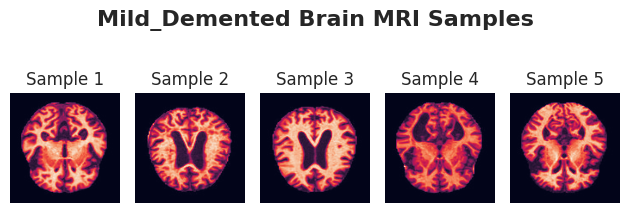

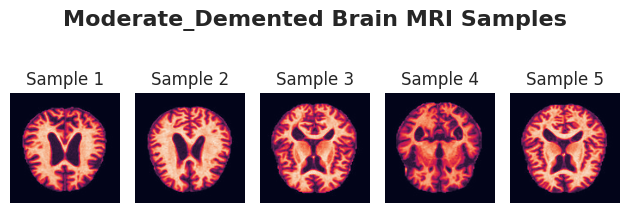

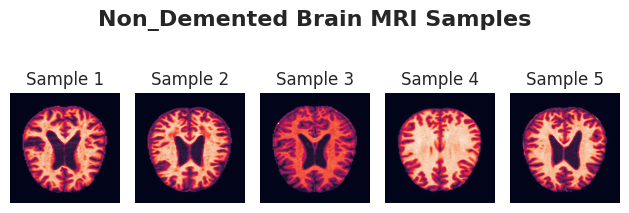

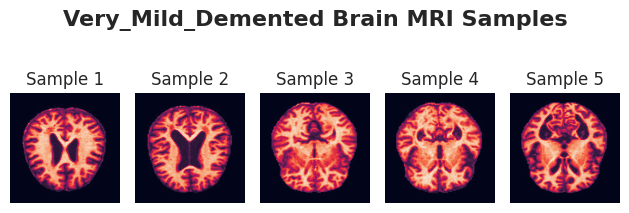

In [ ]:
PATH = '/content/drive/MyDrive/Dataset'
def sample_bringer(path, target, num_samples=5):

    class_path = os.path.join(path, target)

    image_files = [image for image in os.listdir(class_path) if image.endswith('.jpg')]

    fig, ax = plt.subplots(1, num_samples)
    fig.suptitle(f'{target} Brain MRI Samples',fontsize=16, fontweight='bold', y=0.75)

    for i in range(num_samples):
        image_path = os.path.join(class_path, image_files[i])
        img = mpimg.imread(image_path)

        ax[i].imshow(img)
        ax[i].axis('off')
        ax[i].set_title(f'Sample {i+1}')

    plt.tight_layout()

for target in class_names:
    sample_bringer(PATH, target=target)

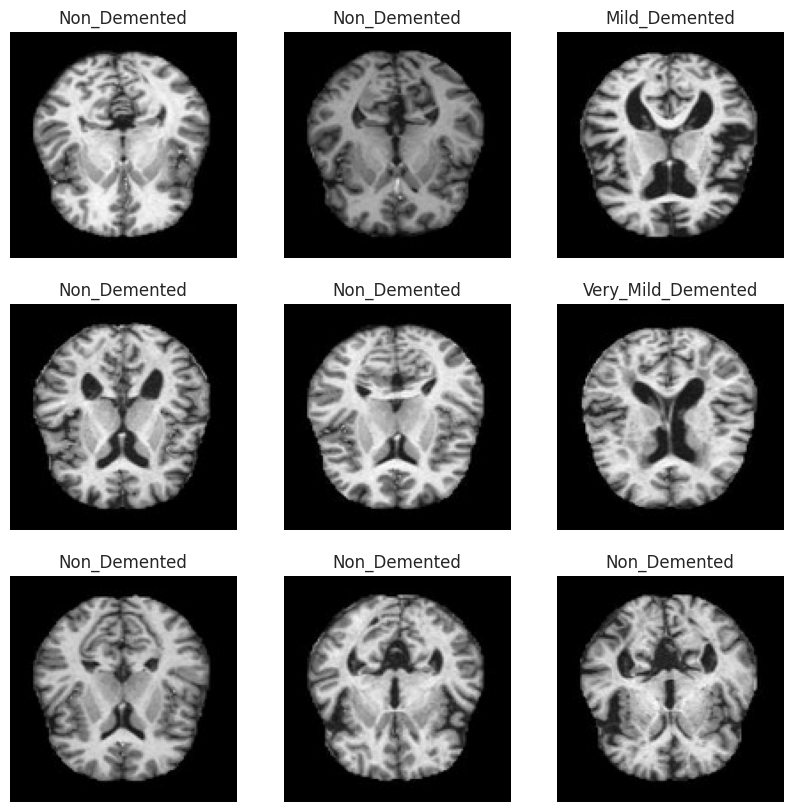

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<function matplotlib.pyplot.show(close=None, block=None)>

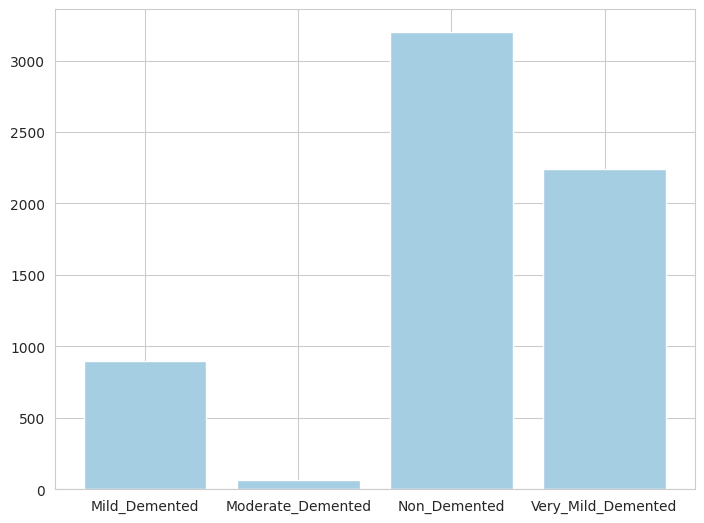

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = [896,64,3200,2240]
ax.bar(class_names,size)
plt.show

# **Model 1 : CNN base model**

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 64)                8128576   
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 8129732 (31.01 MB)
Trainable params: 8129732 (31.01 MB)
Non-trainable params: 0 (0.00 Byte)
________________

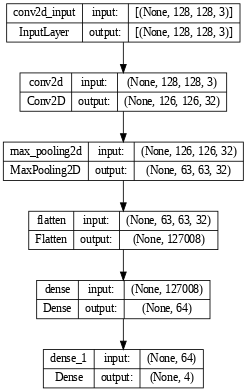

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(
    model, dpi=60,
    show_shapes=True
)

In [ ]:
model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])


In [ ]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=10, batch_size=64, verbose=1)

Epoch 1/10
80/80 [==============================] - 92s 1s/step - loss: 98.5503 - accuracy: 0.4938 - val_loss: 0.9038 - val_accuracy: 0.6870
Epoch 2/10
80/80 [==============================] - 67s 833ms/step - loss: 0.6696 - accuracy: 0.7484 - val_loss: 0.6046 - val_accuracy: 0.7606
Epoch 3/10
80/80 [==============================] - 62s 775ms/step - loss: 0.4150 - accuracy: 0.8488 - val_loss: 0.3728 - val_accuracy: 0.8701
Epoch 4/10
80/80 [==============================] - 62s 775ms/step - loss: 0.2499 - accuracy: 0.9150 - val_loss: 0.2783 - val_accuracy: 0.9014
Epoch 5/10
80/80 [==============================] - 75s 940ms/step - loss: 0.1221 - accuracy: 0.9723 - val_loss: 0.1797 - val_accuracy: 0.9624
Epoch 6/10
80/80 [==============================] - 62s 779ms/step - loss: 0.0547 - accuracy: 0.9955 - val_loss: 0.1323 - val_accuracy: 0.9703
Epoch 7/10
80/80 [==============================] - 63s 783ms/step - loss: 0.0301 - accuracy: 0.9990 - val_loss: 0.1200 - val_accuracy: 0.9640
E

In [ ]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

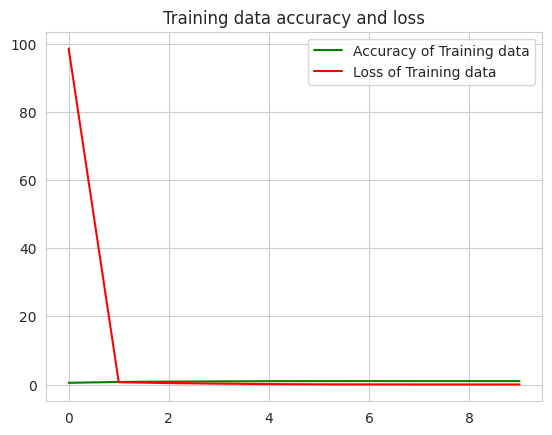

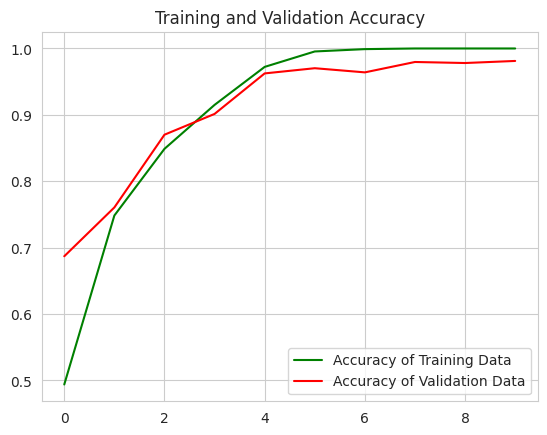

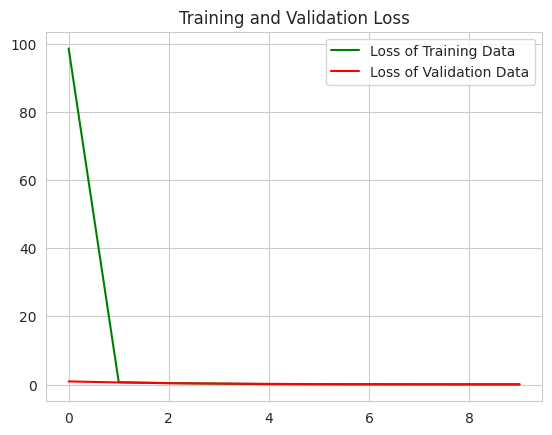

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_ds)

11/11 [==============================] - 2s 182ms/step - loss: 0.0925 - accuracy: 0.9766


1/1 [==============================] - 0s 26ms/step


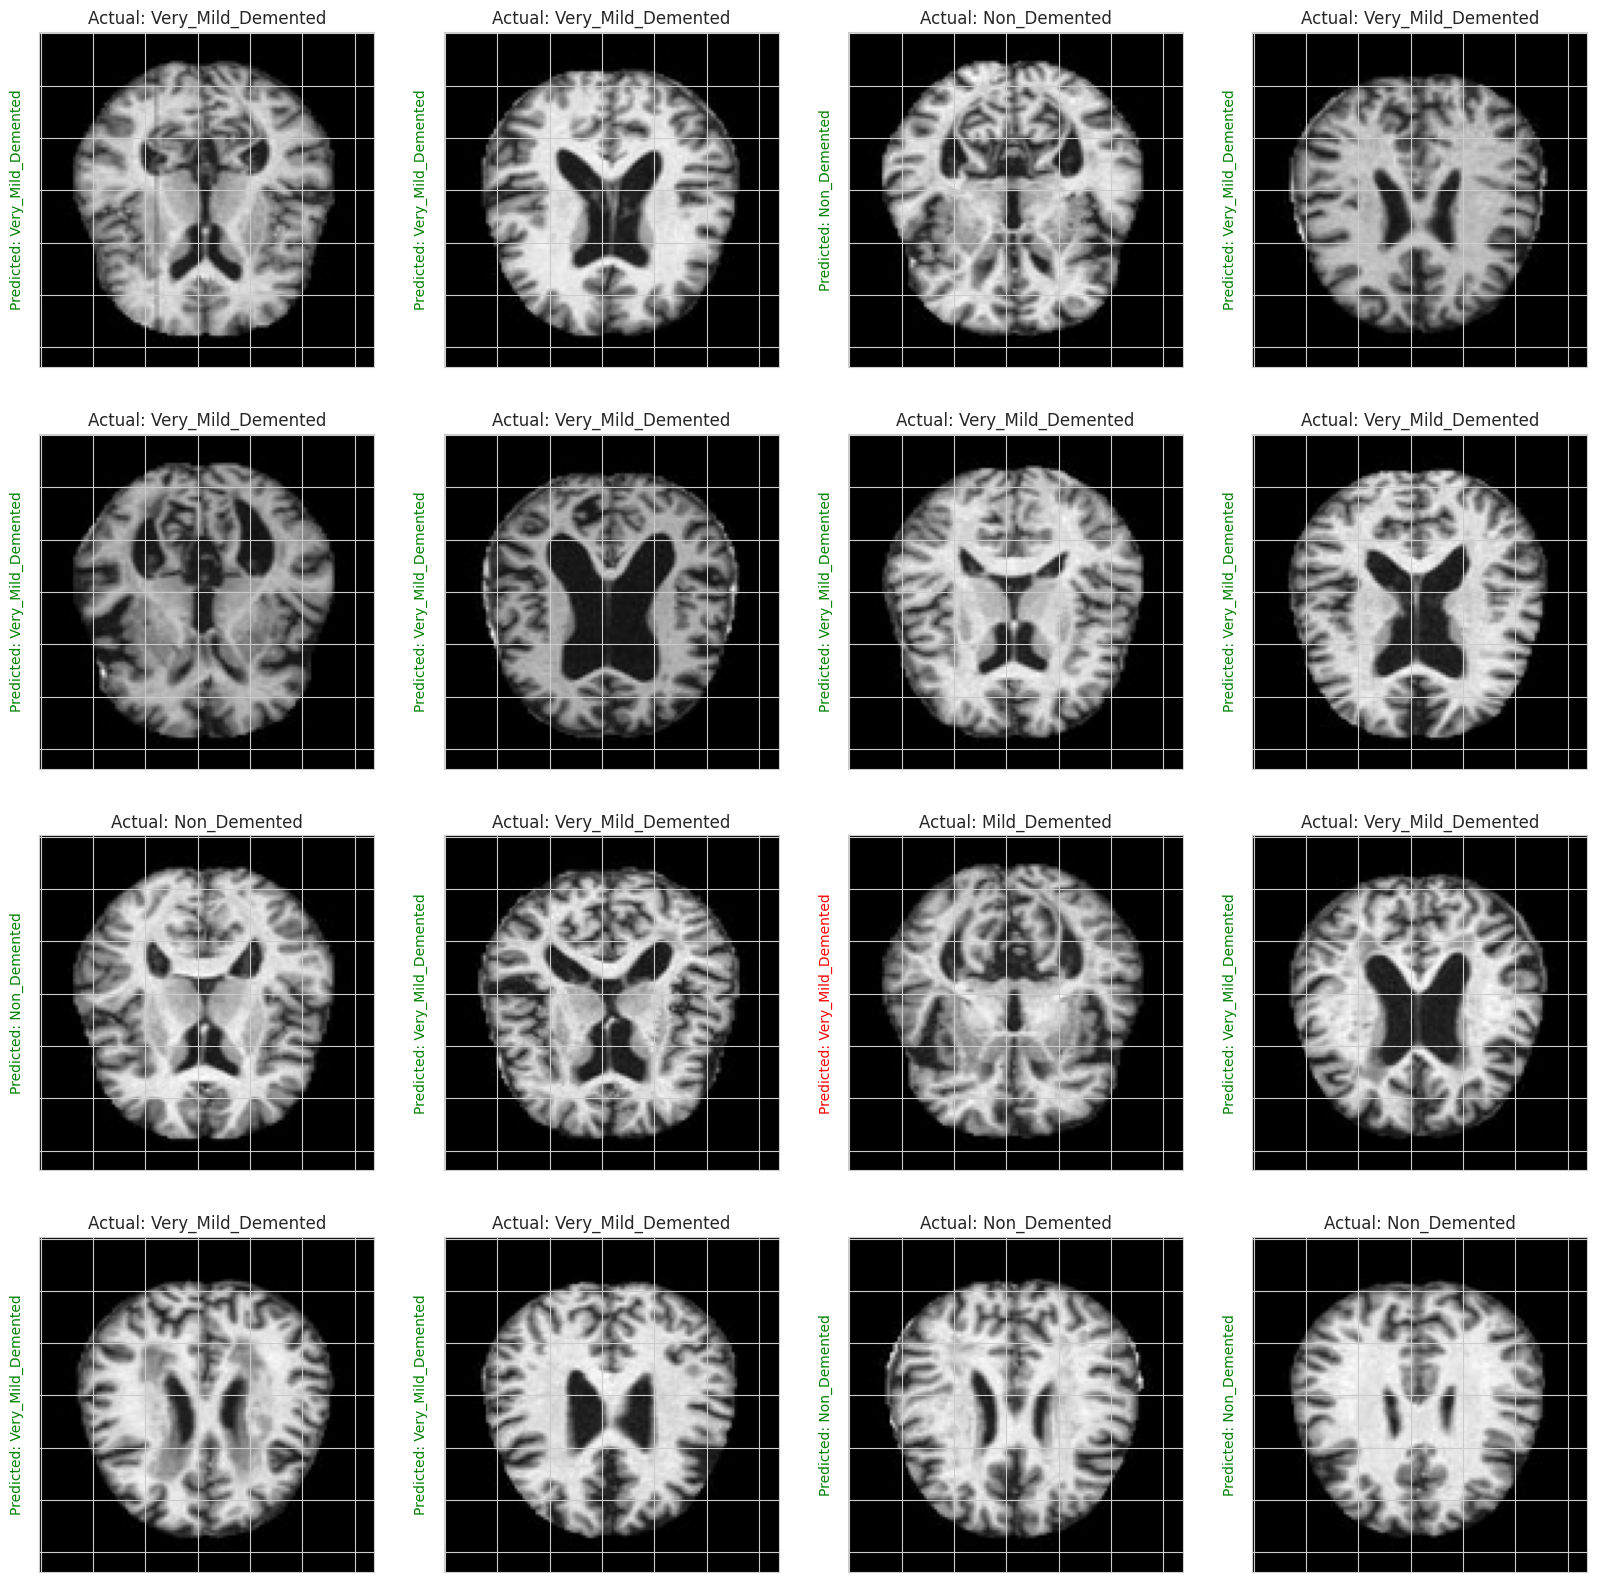

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})

        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])

# **3-Layer CNN model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv2D
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(4,"softmax"))


In [ ]:
# Generate Summary of the Model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)      

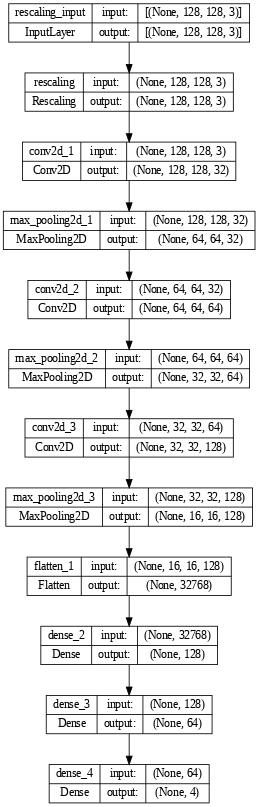

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(
    model, dpi=60,
    show_shapes=True
)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [ ]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=15, batch_size=64, verbose=1)

Epoch 1/15
80/80 [==============================] - 193s 2s/step - loss: 1.1639 - accuracy: 0.5106 - val_loss: 0.8515 - val_accuracy: 0.6260
Epoch 2/15
80/80 [==============================] - 190s 2s/step - loss: 0.8303 - accuracy: 0.6216 - val_loss: 0.7548 - val_accuracy: 0.6479
Epoch 3/15
80/80 [==============================] - 187s 2s/step - loss: 0.6622 - accuracy: 0.7199 - val_loss: 0.5081 - val_accuracy: 0.7887
Epoch 4/15
80/80 [==============================] - 198s 2s/step - loss: 0.3796 - accuracy: 0.8584 - val_loss: 0.2872 - val_accuracy: 0.8905
Epoch 5/15
80/80 [==============================] - 191s 2s/step - loss: 0.1608 - accuracy: 0.9476 - val_loss: 0.1860 - val_accuracy: 0.9358
Epoch 6/15
80/80 [==============================] - 186s 2s/step - loss: 0.0951 - accuracy: 0.9709 - val_loss: 0.1642 - val_accuracy: 0.9390
Epoch 7/15
80/80 [==============================] - 191s 2s/step - loss: 0.0386 - accuracy: 0.9887 - val_loss: 0.0402 - val_accuracy: 0.9906
Epoch 8/15
80

In [ ]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

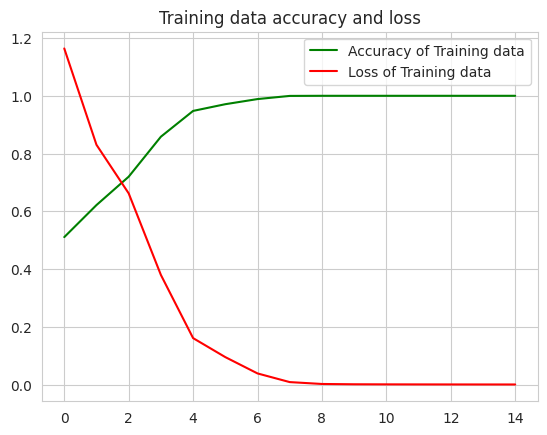

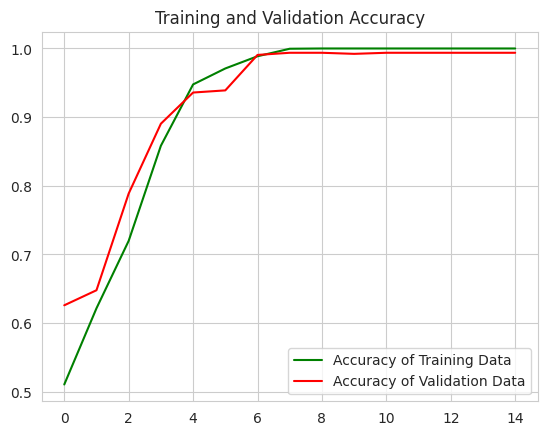

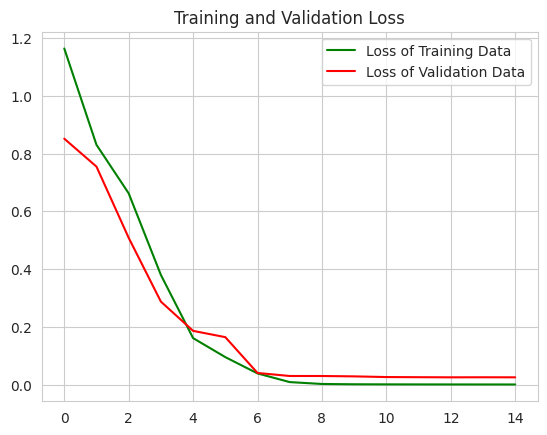

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_ds)

11/11 [==============================] - 9s 806ms/step - loss: 0.0487 - accuracy: 0.9813


1/1 [==============================] - 0s 33ms/step


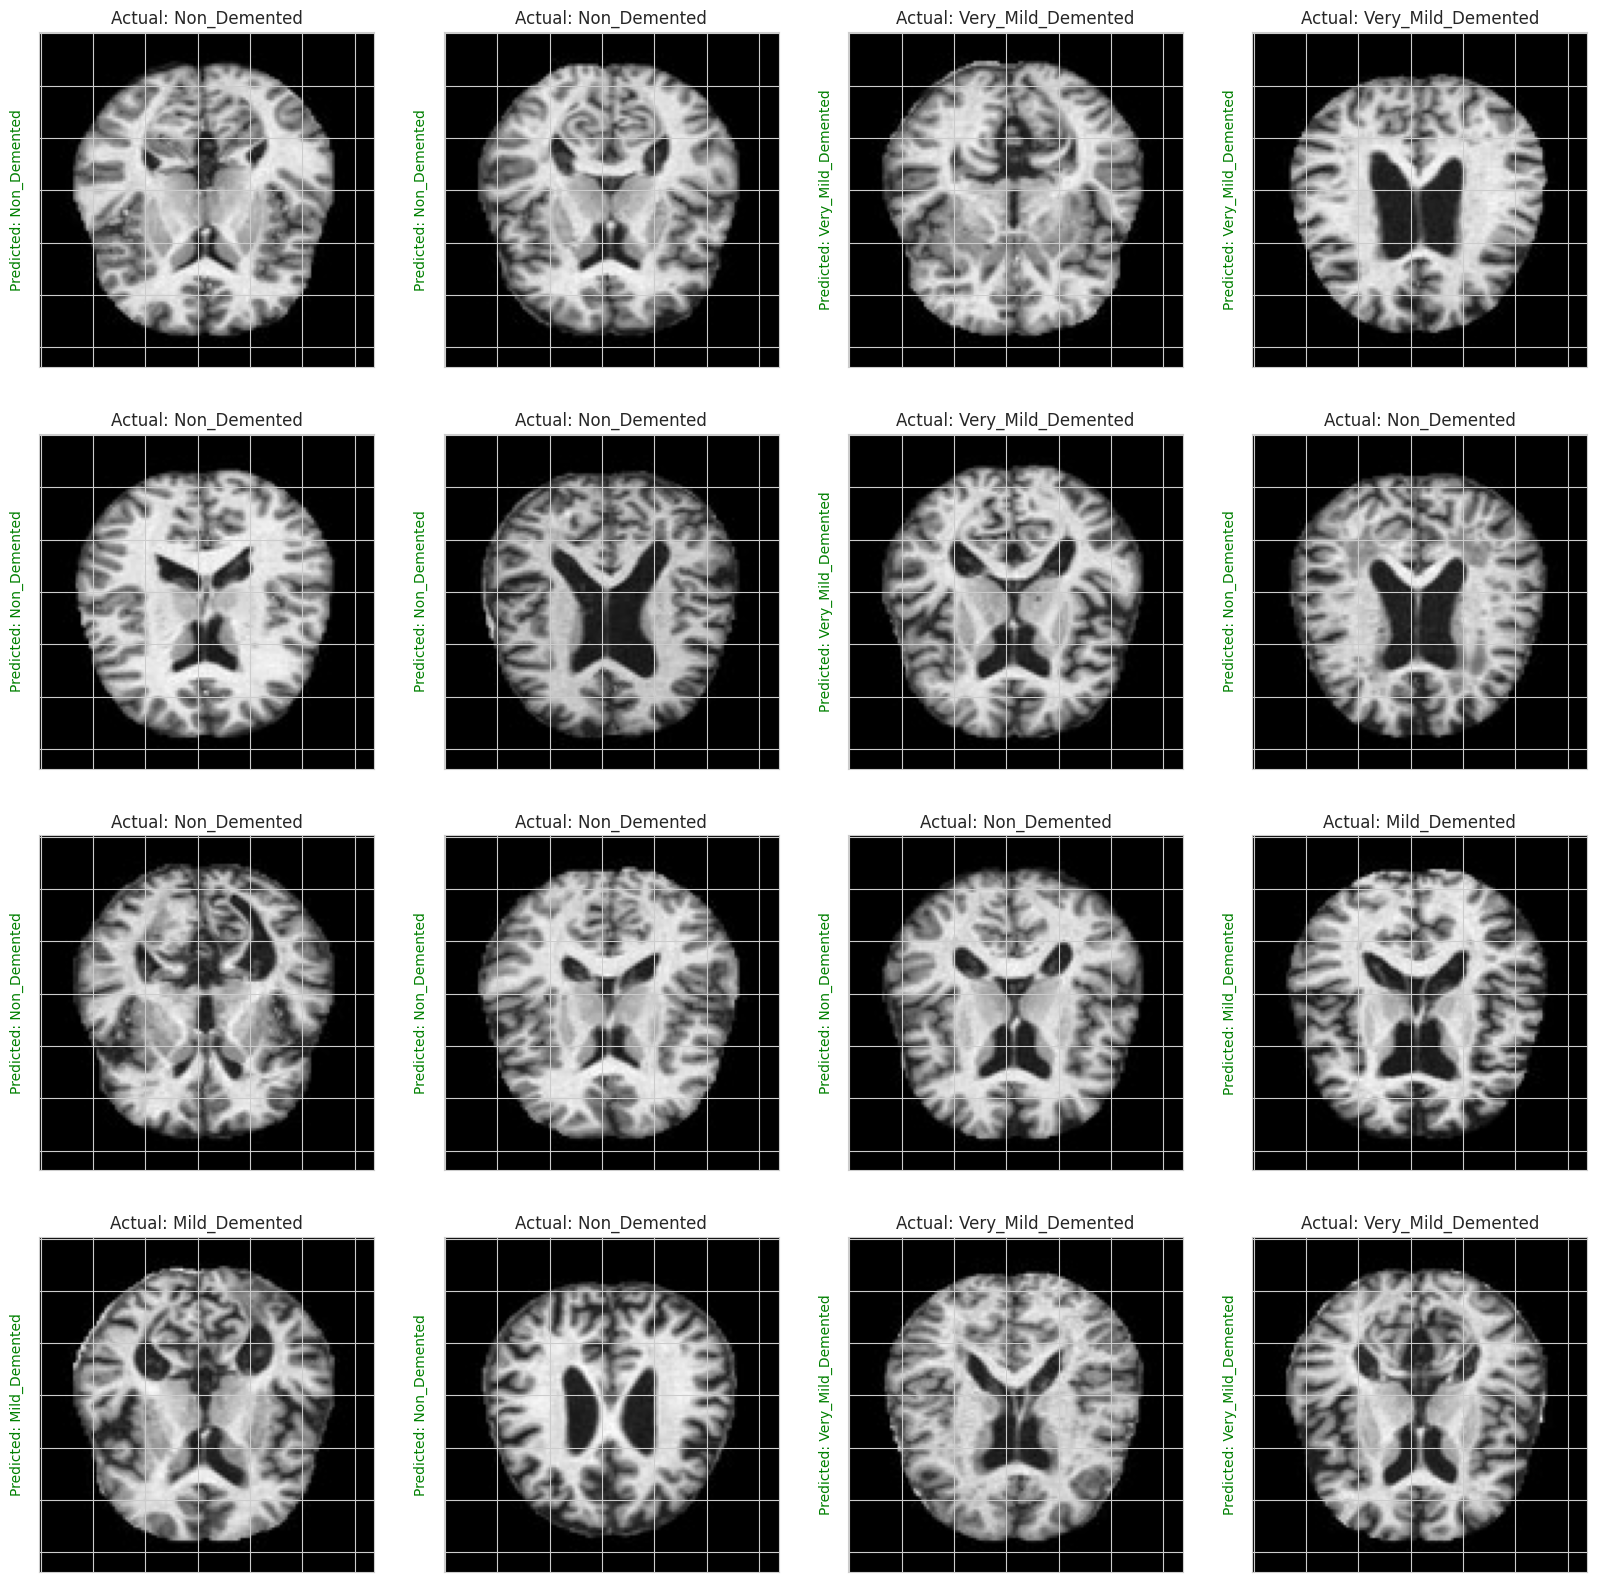

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})

        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])

# **4 layer CNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv2D
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(4,"softmax"))

In [ ]:
# Generate Summary of the Model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)       

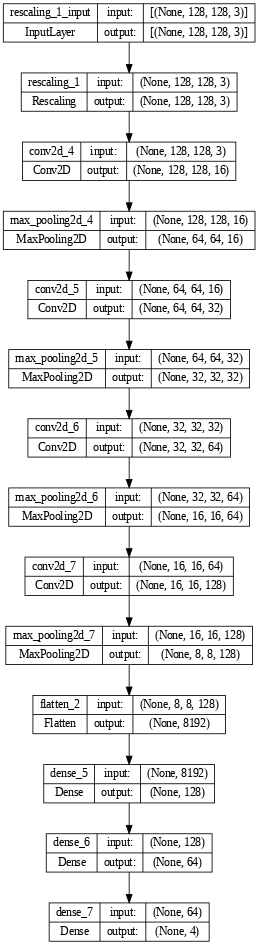

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(
    model, dpi=60,
    show_shapes=True
)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [ ]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=15, batch_size=64, verbose=1)

Epoch 1/15
80/80 [==============================] - 100s 1s/step - loss: 1.0748 - accuracy: 0.4921 - val_loss: 0.8830 - val_accuracy: 0.6103
Epoch 2/15
80/80 [==============================] - 97s 1s/step - loss: 0.9197 - accuracy: 0.5681 - val_loss: 0.8480 - val_accuracy: 0.6025
Epoch 3/15
80/80 [==============================] - 99s 1s/step - loss: 0.7959 - accuracy: 0.6497 - val_loss: 0.6925 - val_accuracy: 0.7027
Epoch 4/15
80/80 [==============================] - 98s 1s/step - loss: 0.6086 - accuracy: 0.7517 - val_loss: 0.4986 - val_accuracy: 0.7887
Epoch 5/15
80/80 [==============================] - 97s 1s/step - loss: 0.3798 - accuracy: 0.8562 - val_loss: 0.3393 - val_accuracy: 0.8779
Epoch 6/15
80/80 [==============================] - 97s 1s/step - loss: 0.1626 - accuracy: 0.9467 - val_loss: 0.1870 - val_accuracy: 0.9280
Epoch 7/15
80/80 [==============================] - 103s 1s/step - loss: 0.0798 - accuracy: 0.9738 - val_loss: 0.0925 - val_accuracy: 0.9687
Epoch 8/15
80/80 [

In [ ]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

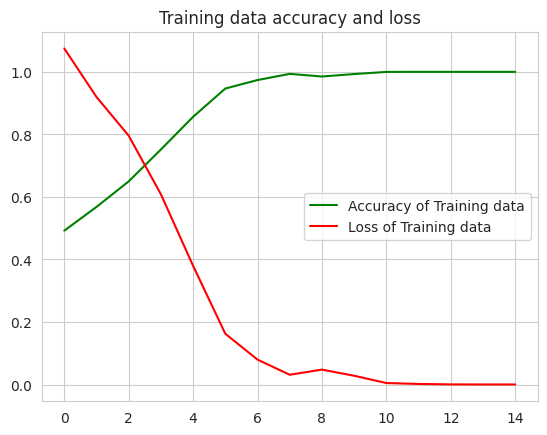

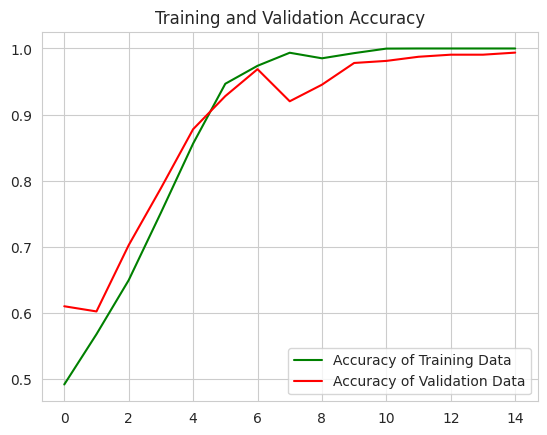

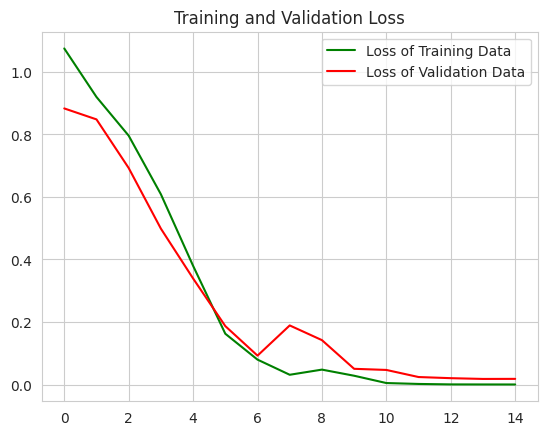

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_ds)

11/11 [==============================] - 3s 260ms/step - loss: 0.0362 - accuracy: 0.9875


1/1 [==============================] - 0s 55ms/step


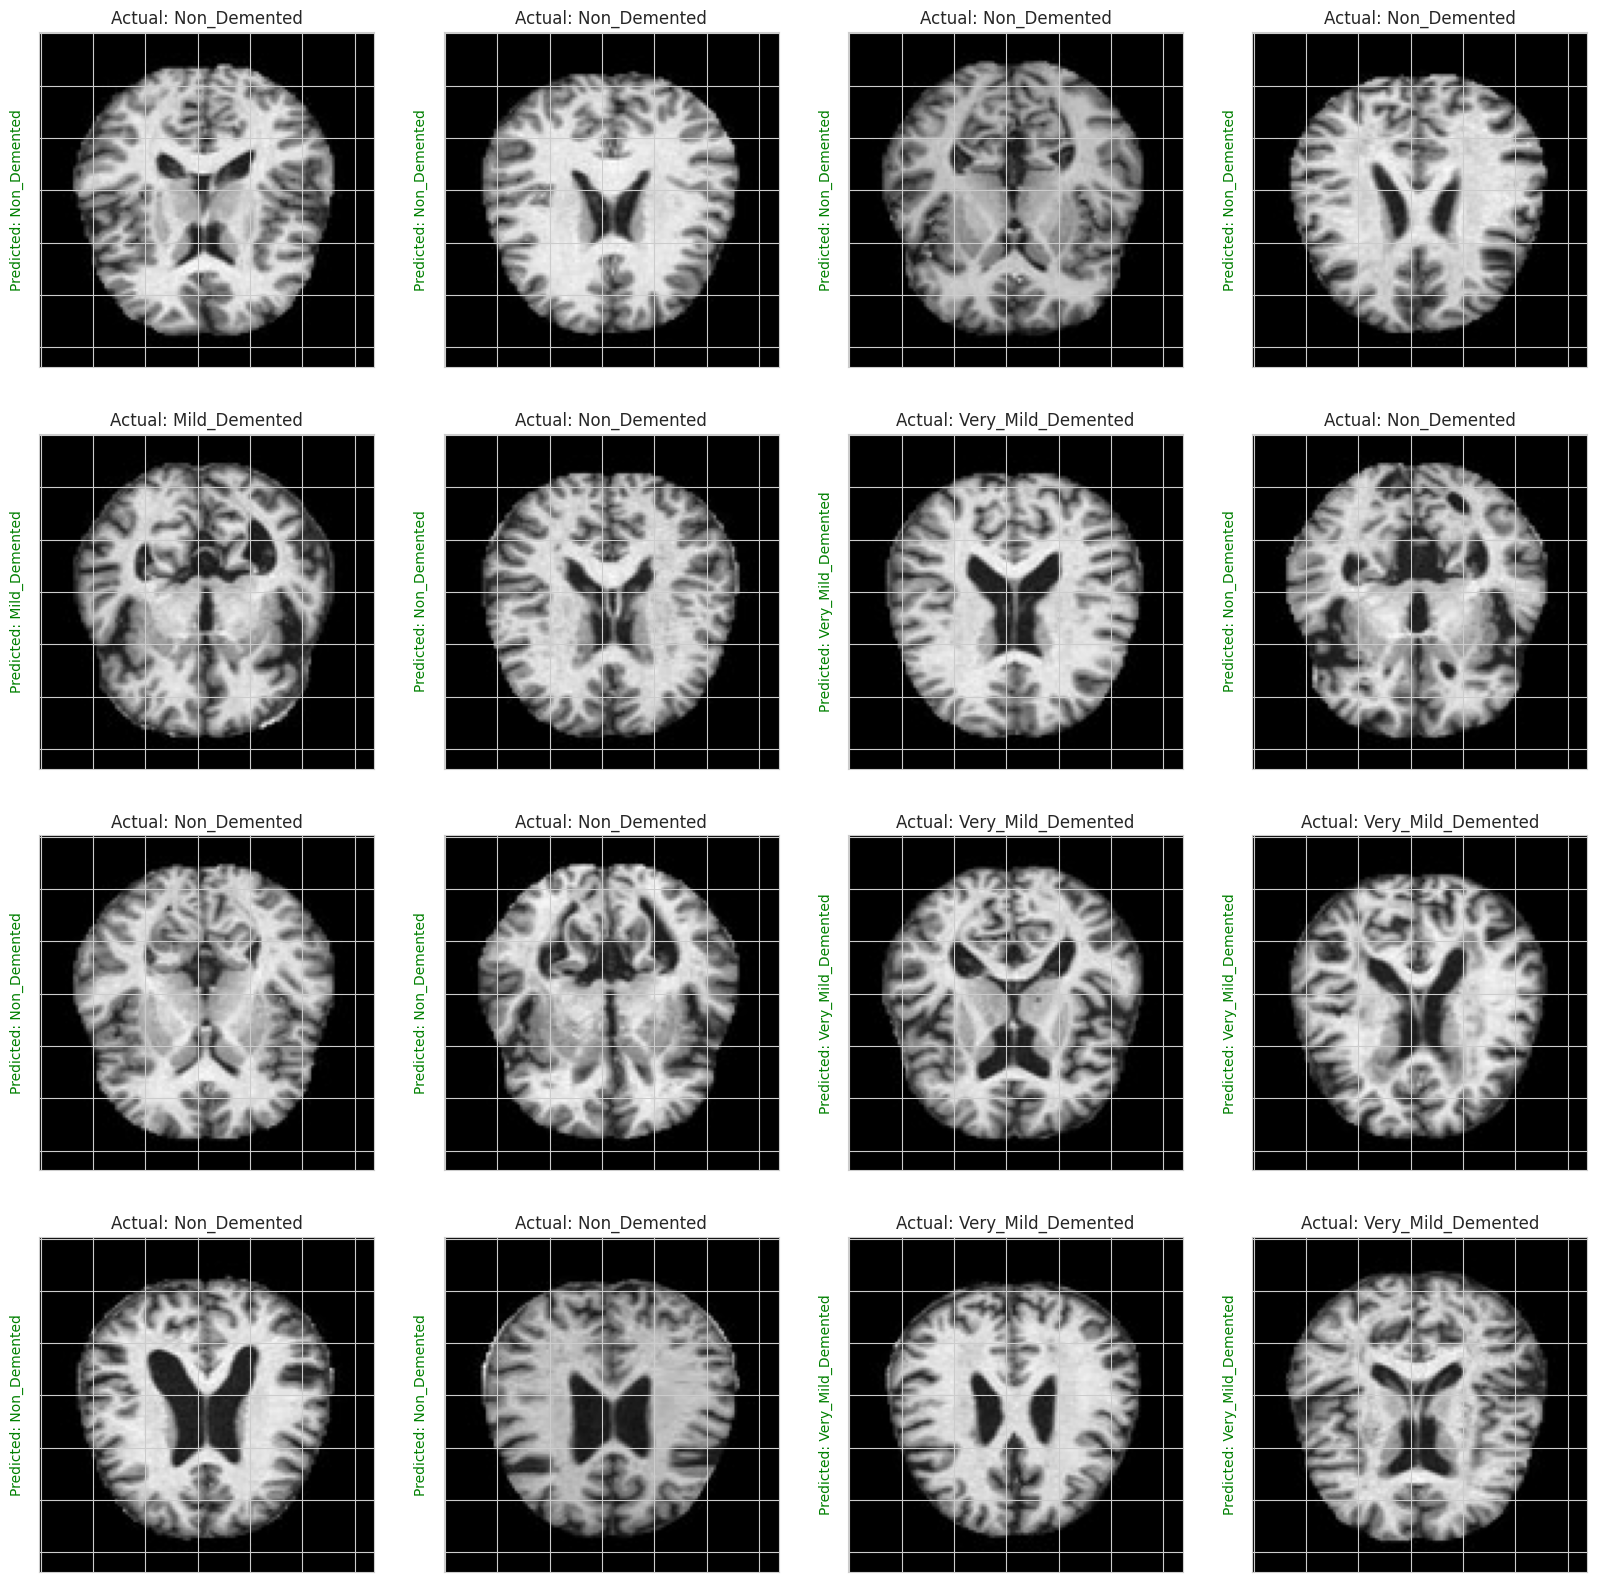

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})

        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])

# **5 Layers CNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv2D
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(4,"softmax"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)       

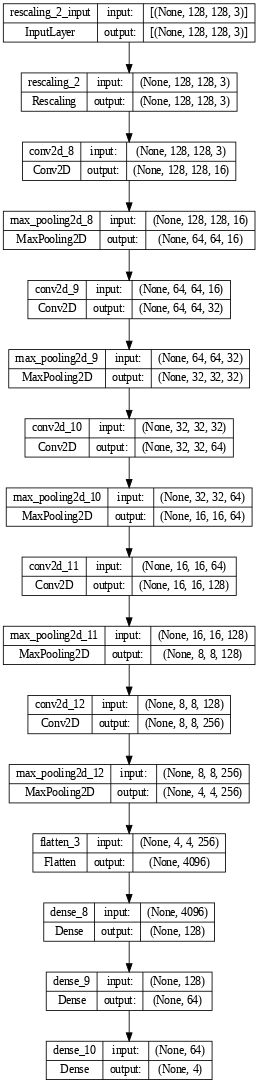

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(
    model, dpi=60,
    show_shapes=True
)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [ ]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=15, batch_size=64, verbose=1)

Epoch 1/15
80/80 [==============================] - 129s 2s/step - loss: 1.0547 - accuracy: 0.4942 - val_loss: 0.9258 - val_accuracy: 0.5931
Epoch 2/15
80/80 [==============================] - 111s 1s/step - loss: 0.9203 - accuracy: 0.5538 - val_loss: 0.8213 - val_accuracy: 0.6197
Epoch 3/15
80/80 [==============================] - 112s 1s/step - loss: 0.8119 - accuracy: 0.6255 - val_loss: 0.6856 - val_accuracy: 0.6995
Epoch 4/15
80/80 [==============================] - 111s 1s/step - loss: 0.5942 - accuracy: 0.7482 - val_loss: 0.4602 - val_accuracy: 0.8153
Epoch 5/15
80/80 [==============================] - 110s 1s/step - loss: 0.3505 - accuracy: 0.8650 - val_loss: 0.3029 - val_accuracy: 0.8936
Epoch 6/15
80/80 [==============================] - 110s 1s/step - loss: 0.1745 - accuracy: 0.9406 - val_loss: 0.1991 - val_accuracy: 0.9218
Epoch 7/15
80/80 [==============================] - 112s 1s/step - loss: 0.1262 - accuracy: 0.9584 - val_loss: 0.1566 - val_accuracy: 0.9358
Epoch 8/15
80

In [ ]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

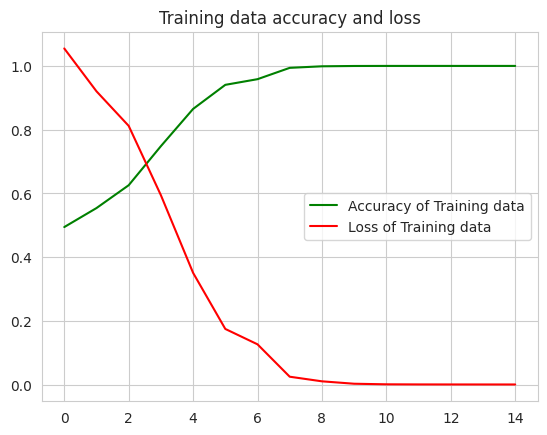

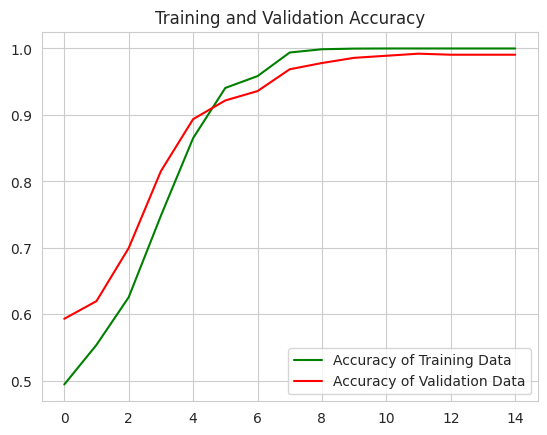

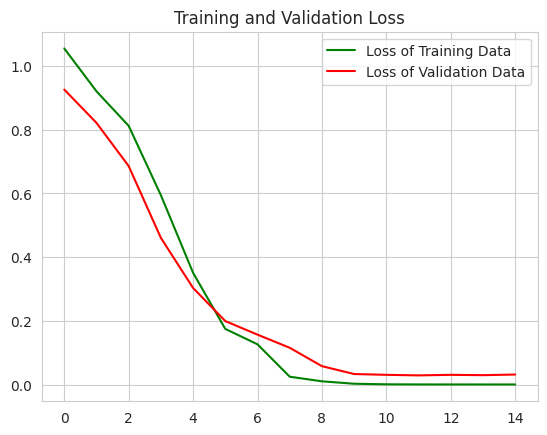

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_ds)

11/11 [==============================] - 3s 293ms/step - loss: 0.0710 - accuracy: 0.9860


1/1 [==============================] - 0s 48ms/step


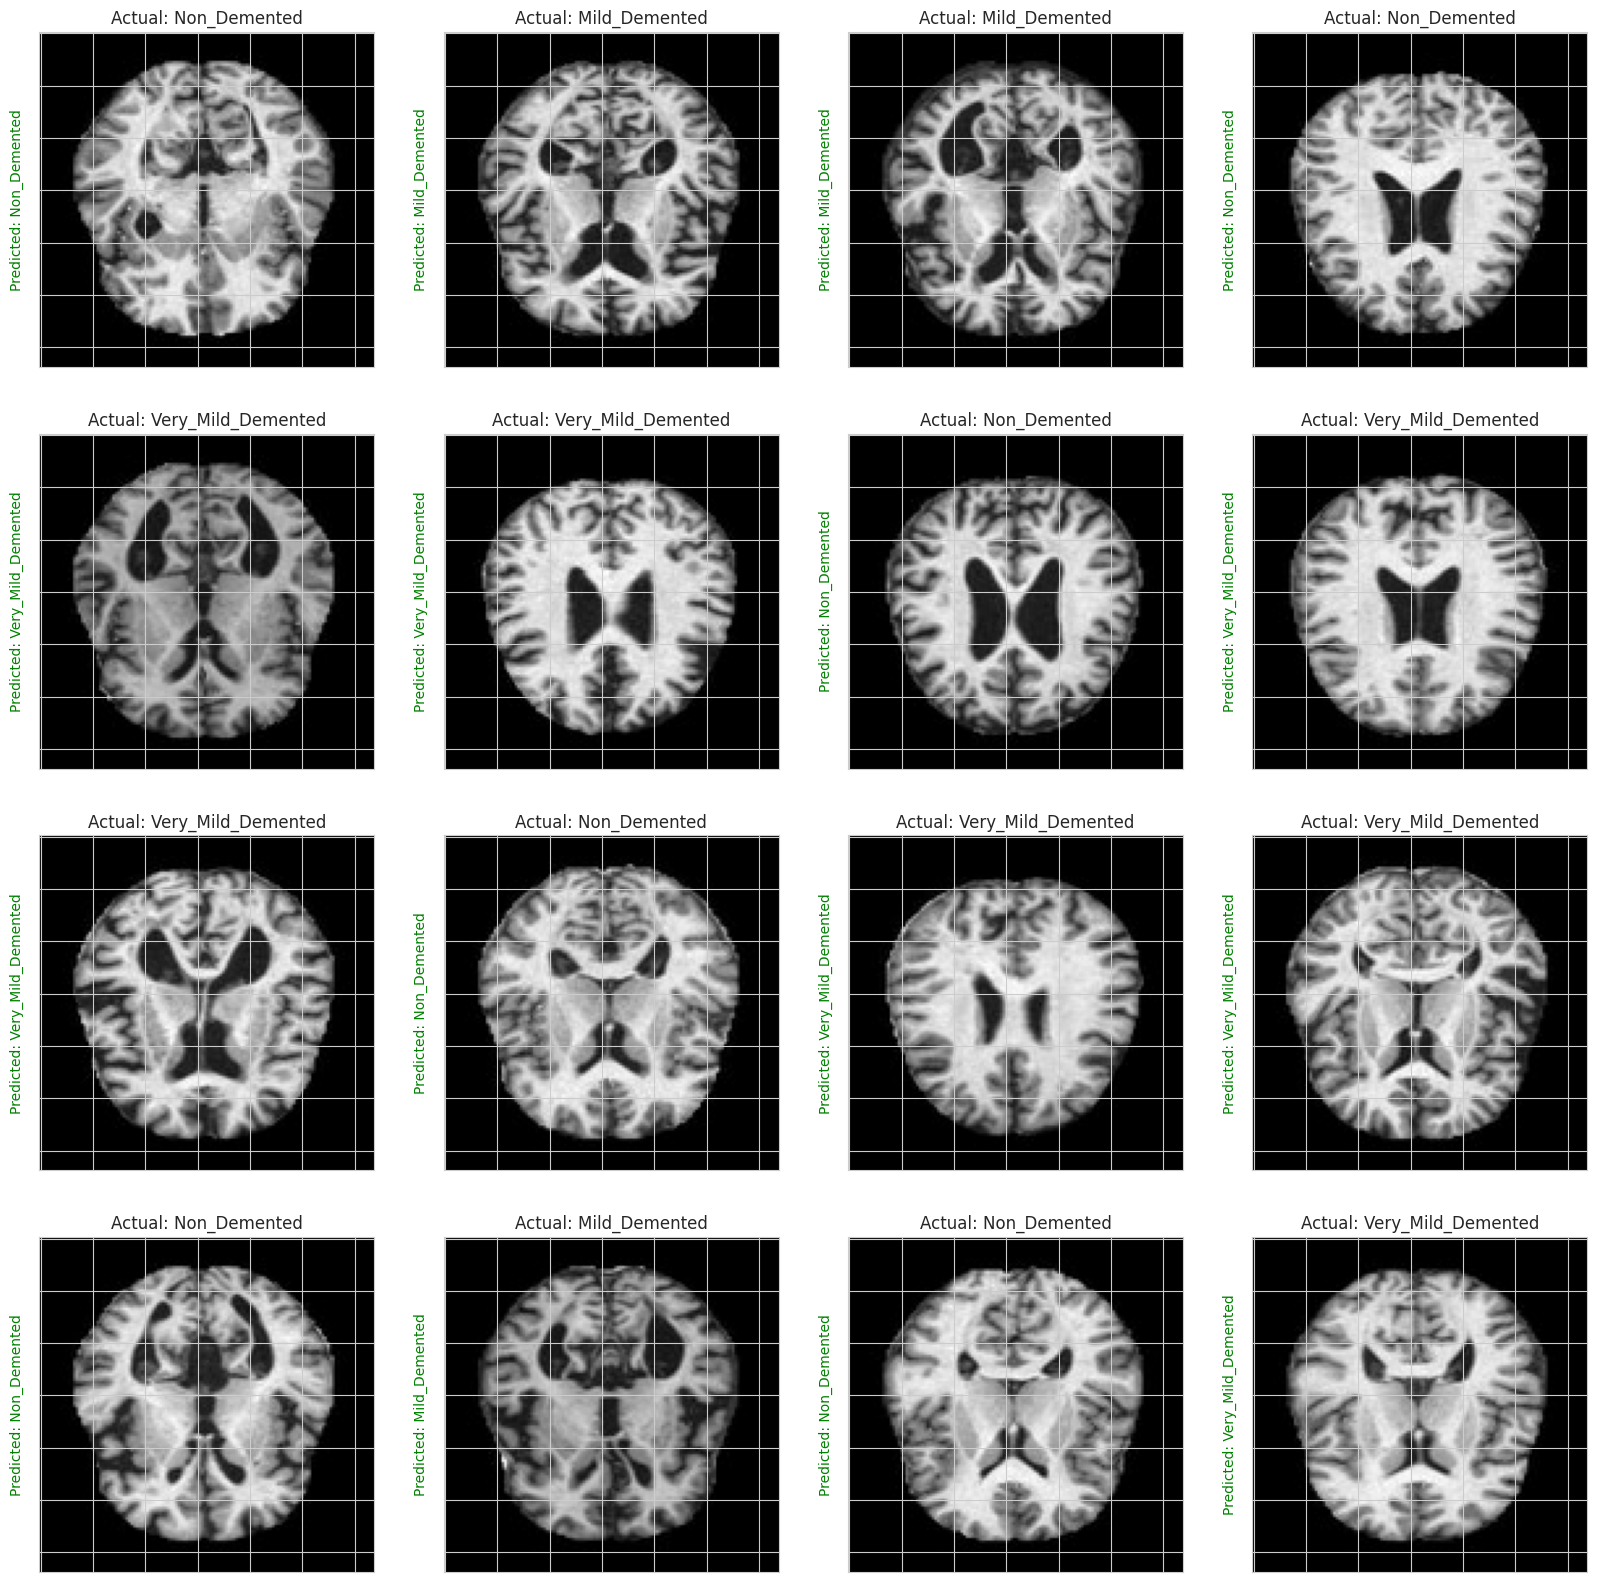

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})

        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])

# **CNN model with VGG16 architecture**


In [ ]:
IMAGE_SIZE = [128,128]

train_path = './output/train'
val_path = './output/val'

In [ ]:
vgg16 = VGG16(input_shape = IMAGE_SIZE+[3],weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
for layer in vgg16.layers:
  layer.trainable= False

In [ ]:
folder = glob('./output/train*')

In [ ]:
folder

['./output/train']

In [ ]:
x = Flatten()(vgg16.output)

In [ ]:
prediction = Dense(4,activation='softmax')(x)
model = Model(inputs=vgg16.input , outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('./output/train',
                             target_size = (128,128),
                             batch_size = 64,
                             class_mode='categorical')

Found 5119 images belonging to 4 classes.


In [ ]:
val_set = test_datagen.flow_from_directory('./output/val',
                             target_size = (128,128),
                             batch_size = 64,
                             class_mode='categorical')

Found 639 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('./output/test',
                             target_size = (128,128),
                             batch_size = 64,
                             class_mode='categorical')

Found 642 images belonging to 4 classes.


In [ ]:
r = model.fit(
    training_set,
    validation_data = val_set,
    epochs = 10,
    steps_per_epoch = len(training_set),
    validation_steps = len(val_set)
)

Epoch 1/10
80/80 [==============================] - 1112s 14s/step - loss: 1.0169 - accuracy: 0.5230 - val_loss: 0.9445 - val_accuracy: 0.5180
Epoch 2/10
80/80 [==============================] - 1090s 14s/step - loss: 0.9019 - accuracy: 0.5763 - val_loss: 0.8598 - val_accuracy: 0.5728
Epoch 3/10
80/80 [==============================] - 1116s 14s/step - loss: 0.8701 - accuracy: 0.5941 - val_loss: 0.8139 - val_accuracy: 0.6322
Epoch 4/10
80/80 [==============================] - 1114s 14s/step - loss: 0.8226 - accuracy: 0.6198 - val_loss: 0.8448 - val_accuracy: 0.5994
Epoch 5/10
80/80 [==============================] - 1117s 14s/step - loss: 0.8200 - accuracy: 0.6255 - val_loss: 0.8169 - val_accuracy: 0.6166
Epoch 6/10
80/80 [==============================] - 1117s 14s/step - loss: 0.7808 - accuracy: 0.6476 - val_loss: 0.8050 - val_accuracy: 0.6119
Epoch 7/10
80/80 [==============================] - 1123s 14s/step - loss: 0.7761 - accuracy: 0.6486 - val_loss: 0.7740 - val_accuracy: 0.6385

In [ ]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

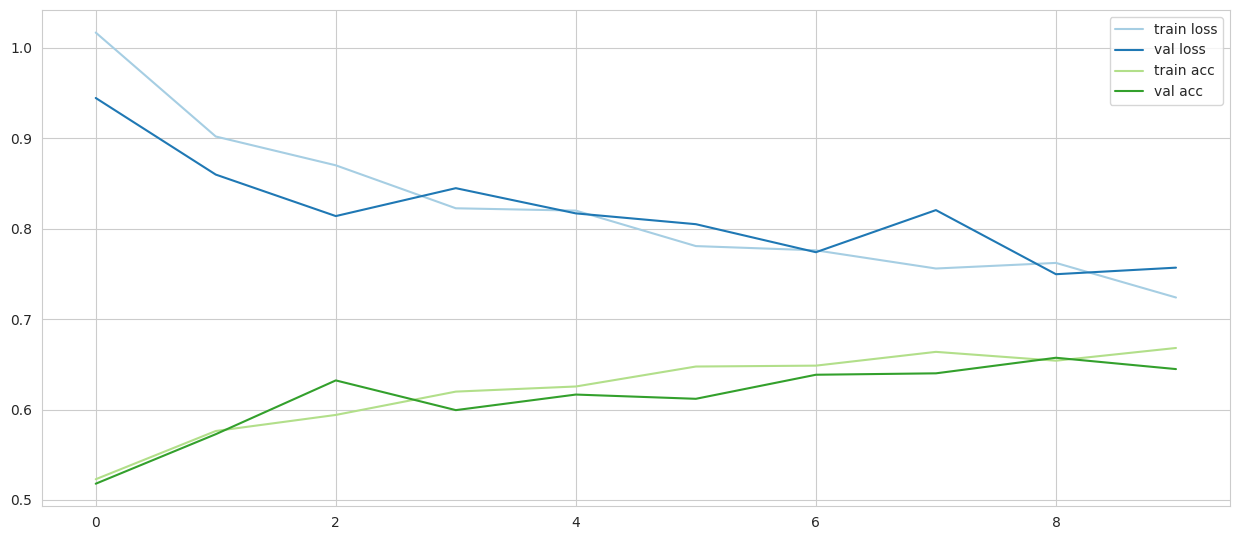

In [ ]:
plt.rcParams["figure.figsize"] = [12.50, 5.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 1)

plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')

plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save('./output/VGG16.h5')

In [ ]:
loss, accuracy = model.evaluate(test_set)

11/11 [==============================] - 121s 11s/step - loss: 0.7487 - accuracy: 0.6324


In [ ]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('./output/VGG16.h5')

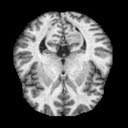

In [ ]:
img = load_img('/content/output/test/Non_Demented/non_1223.jpg',target_size = (128,128))
img

In [ ]:
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x=x/255
x
x.shape

(128, 128, 3)

In [ ]:
img = x.reshape((1,128,128,3))
img.shape
img

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [ ]:
ans = model.predict(img).argmax()
ans

1/1 [==============================] - 0s 354ms/step


2

In [ ]:
if ans==0:
  print("Image is of Mild Demented")
if ans==1:
  print("Image is of Moderate Demented")
if ans==2:
  print("Image is of Non Demented")
if ans==3:
  print("Image is of Very Mild Demented")

Image is of Non Demented
